# Proyecto Fase 1
## Grupo 1
Modelacion y Simulacion 2 
Segundo Semestre

## Descripccion de variables
_En base al csv proporcionado se tomaron en cuenta las siguientes variables._
- **Order Date Time:** Fecha y hora en la que se realizó el pedido.
- **Board Type:** Tipo de tarjeta de video.
- **Quantity:** Número de tarjetas de video solicitadas en cada pedido.
- **Pick Pack Time:** Tiempo empleado para procesar el pedido (picking y packing), medido en minutos.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# carga de archivo Datos.csv
df = pd.read_csv('./Datos.csv')

#limpiar los datos
dataout = df.dropna(how='all') 
dataLimpia = dataout.dropna(axis=1, how='all')

#informacion de los datos
print(dataLimpia.head())
print("-------------------------------------")
print(dataLimpia.info())
print("-------------------------------------")
print(dataLimpia.describe())

       Order Date Time Board Type  Quantity  Pick Pack Time
0  01/07/2022 00:00:06          C         4            5.20
1  01/07/2022 00:01:31          C         3            4.90
2  01/07/2022 00:06:37          A         9            7.37
3  01/07/2022 00:12:59          C         4            5.15
4  01/07/2022 00:15:09          C         1            3.67
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91974 entries, 0 to 91973
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order Date Time  91974 non-null  object 
 1   Board Type       91974 non-null  object 
 2   Quantity         91974 non-null  int64  
 3   Pick Pack Time   91974 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.8+ MB
None
-------------------------------------
           Quantity  Pick Pack Time
count  91974.000000    91974.000000
mean       4.422967        5.212246
std  

## Minimos y Maximos

            min  max
Board Type          
A             1   13
B             1   12
C             1    7


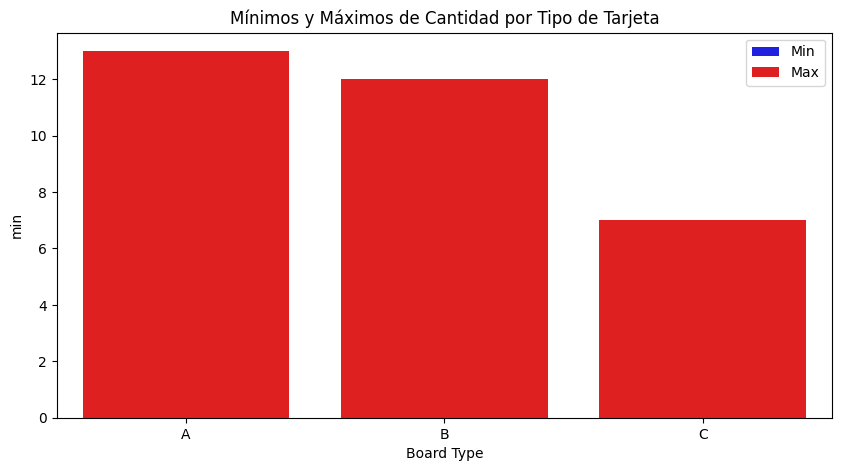

In [13]:
min_max= dataLimpia.groupby('Board Type')['Quantity'].agg(['min', 'max'])
print(min_max)

plt.figure(figsize=(10,5))
sns.barplot(data=min_max.reset_index(), x='Board Type', y='min', color='blue', label='Min')
sns.barplot(data=min_max.reset_index(), x='Board Type', y='max', color='red', label='Max')
plt.legend()
plt.title('Mínimos y Máximos de Cantidad por Tipo de Tarjeta')
plt.show()

## Cantidad de pedidos por tarjeta


Board Type
C    45279
B    24724
A    21971
Name: count, dtype: int64


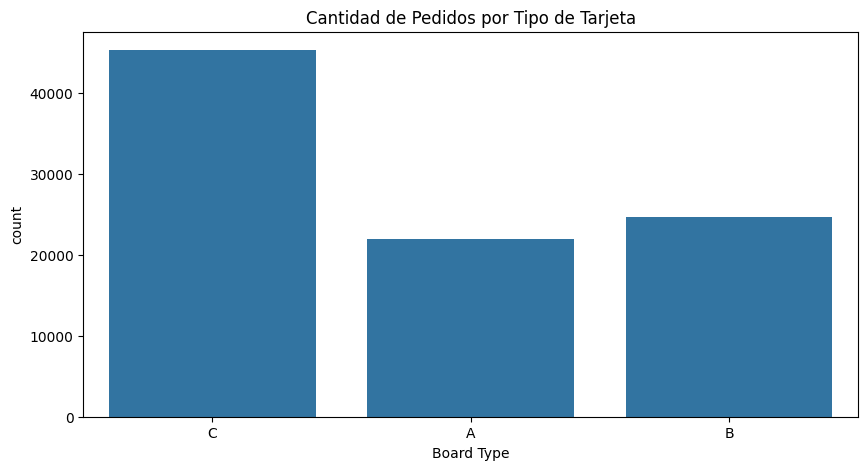

In [15]:
pedidos_type = df['Board Type'].value_counts()
print(pedidos_type)

plt.figure(figsize=(10,5))
sns.countplot(data=dataLimpia, x='Board Type')
plt.title('Cantidad de Pedidos por Tipo de Tarjeta')
plt.show()

## Cantidad de Tarjetas de video por tipo


Board Type
A    128273
B    119960
C    158565
Name: Quantity, dtype: int64


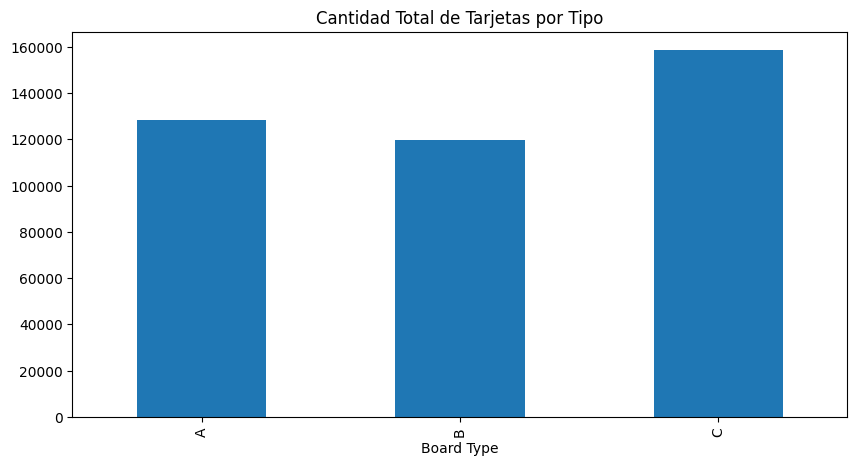

In [17]:
tarjetasxtipo = df.groupby('Board Type')['Quantity'].sum()
print(tarjetasxtipo)

plt.figure(figsize=(10,5))
tarjetasxtipo.plot(kind='bar')
plt.title('Cantidad Total de Tarjetas por Tipo')
plt.show()

## Inventario inicial


In [18]:
initial_inventory = df.groupby('Board Type')['Quantity'].sum()
print(initial_inventory)

Board Type
A    128273
B    119960
C    158565
Name: Quantity, dtype: int64
